In [146]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import linear_model, datasets

import math

df = pd.read_csv('scanData.txt',delimiter=',')
x = df.values[:,0]
y = df.values[:,1]

df = pd.read_csv('scanData.txt',delimiter=',')
angle = df.values[:,0]
distance = df.values[:,1]
cartesian = [(r*math.cos(phi*math.pi/180), r*math.sin(phi*math.pi/180)) for r, phi in zip(distance, angle)]
x, y = map(list, zip(*cartesian))
#print(x)

In [147]:
x=  np.array(x)
y=  np.array(y)

In [148]:
x=x.reshape(-1, 1)
y=y.reshape(-1, 1)
#print("x: ",x)
#print("y: ", y)

In [142]:
lr = linear_model.LinearRegression()
lr.fit(x, y)
ransac = linear_model.RANSACRegressor(max_trials=1000,min_samples=3)
ransac.fit(x, y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=1000,
                min_samples=3, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [151]:
# Predict data of estimated models
line_X = np.arange(x.min(), x.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)
print(line_y_ransac)

[[109.27827099]
 [109.41603062]
 [109.55379025]
 ...
 [828.38353559]
 [828.52129522]
 [828.65905484]]


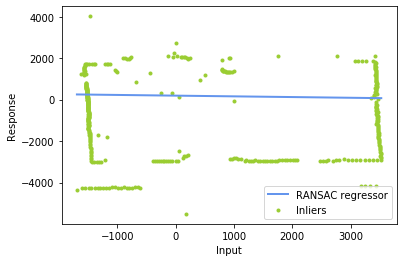

In [141]:
plt.scatter(x,y, color='yellowgreen', marker='.',
            label='Inliers')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=2,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()